## In this section, we will randomly select some llm response from each policy types and analyze the quality of the response.


In [1]:
import json
import random
from IPython.display import Markdown, display


# First of all, let's export LLM responses to a Excel file for manual review

In [ ]:
# export policies_llama3_2_updated_json file to excel
import pandas as pd
df = pd.read_json("./Policies_llama3_2_updated.json")
df.to_excel("./Policies_llama3_2_updated.xlsx", index=False)

In [7]:
# then read the Policies_llama3_2_updated_manual_reviewed.xlsx file
df = pd.read_excel("./Policies_llama3_2_updated_manual_reviewed.xlsx")
# subset df that only Q1 Human Review, Q2 Human Review, Q3 Human Review and Q4 Human Review columns have value
df = df[df['Q1 Human Review'].notnull() & df['Q2 Human Review'].notnull() & df['Q3 Human Review'].notnull() & df['Q4 Human Review'].notnull()]

# create a table that calculate Q1, Q2, Q3, Q4 accuracy rate after human review
Q1_accuracy_rate = round(df['Q1 Human Review'].sum() / len(df), 2)
Q2_accuracy_rate = round(df['Q2 Human Review'].sum() / len(df), 2)
Q3_accuracy_rate = round(df['Q3 Human Review'].sum() / len(df), 2)
Q4_accuracy_rate = round(df['Q4 Human Review'].sum() / len(df), 2)


question = ['Q1', 'Q2', 'Q3', 'Q4']
accuracy_rate = [Q1_accuracy_rate, Q2_accuracy_rate, Q3_accuracy_rate, Q4_accuracy_rate]
# create a summary dataframe
summary_df = pd.DataFrame({'Question': question, 'Accuracy Rate': accuracy_rate})
summary_df

,Question,Accuracy Rate
0,Q1,0.67
1,Q2,0.73
2,Q3,0.60
3,Q4,0.80


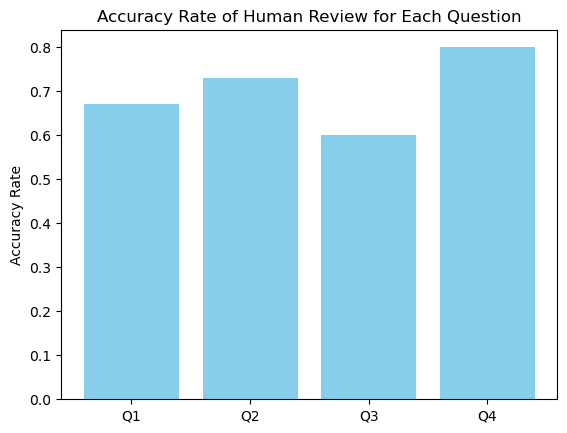

In [8]:
# Plot summary_df to bar chart
import matplotlib.pyplot as plt
plt.bar(summary_df['Question'], summary_df['Accuracy Rate'], color='skyblue')
plt.title('Accuracy Rate of Human Review for Each Question')
plt.ylabel('Accuracy Rate')
plt.xticks(rotation=0)
plt.show()


## The section below illustrates sample of questions asked to the llm model and the response generated by the model.


### First of all, initialize all questions asked to the llm model.


In [2]:
q1 = "Please list all policies that contain unnecessary content such as cross-references to other policies (there's a space for this in the policy documents, but not in the words of the policy itself)?"

q2 = "Please list all policies that contain parts that are actually Procedures, not Policies (e.g. they contain instructions on how to do something, rather than rules or principles)?"

q3 = "Please list all policies that contain inconsistencies or structural flaws. For example, if a policy is missing a section that is present in other policies, or if a policy has a section that is not relevant to the policy type?"

q4 = "Please list all redundancy or incorrect structure of policy. It could be that there's a better way to structure the policy database, or that some policies are redundant or overlapping?"


### Then start to randomly select some responses from each policy type and analyze the quality of the response.

Below is a function I created to print the response from the llm model in a more readable markdown format.

In [3]:
# Randomly select two responses from regulations
def print_llm_response(policy_type):
    with open(f"./{policy_type}_llama3_2.json") as f:
        data = json.load(f)
    # set seed
    random.seed(1)
    # randomly select two responses
    response1 = random.choice(data)
    random.seed(99)
    response2 = random.choice(data)

    location1 = f"../output/html/{policy_type}/{response1['name']}.html"
    location2 = f"../output/html/{policy_type}/{response2['name']}.html"

    
    display(
        Markdown(
            f"## Responses are based on the first sample policy {response1['name']} from selected {policy_type}:\n\n"
        )
    )

    display(Markdown(response1["q1_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the second question is:\n"))
    display(Markdown(response1["q2_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the third question is:\n"))
    display(Markdown(response1["q3_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the fourth question is:\n"))
    display(Markdown(response1["q4_response"] + "\n"))
    
    display(
        Markdown(
            f"## Responses are based on the second sample policy {response2['name']} from selected {policy_type}:\n\n"
        )
    )
    display(Markdown(response2["q1_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the second question is:\n"))
    display(Markdown(response2["q2_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the third question is:\n"))
    display(Markdown(response2["q3_response"] + "\n"))
    display(Markdown("### The response from LLM regarding the fourth question is:\n"))
    display(Markdown(response2["q4_response"] + "\n"))

    
    display(Markdown(f"**{response1['name']} policy can be found [here]({location1})**\n"))
    display(Markdown(f"**{response2['name']} policy can be found [here]({location2})**\n"))

#### Firstly, print 2 randomly selected responses from Plans_Strategies policy type.

In [4]:
print_llm_response("Plans_Strategies")

## Responses are based on the first sample policy Emergency_Management_Plan from selected Plans_Strategies:



Based on the provided JSON data, I can see that there are no policies with cross-references to other policies in the given document. The scope and content fields do not indicate any unnecessary information. Therefore, I couldn't find any policies containing unnecessary content. If you'd like to share more policy data, I'll be happy to help further!


### The response from LLM regarding the second question is:


Based on the provided JSON data, there are no policies that contain parts that are actually procedures, not policies. The scope and content fields do not provide any indications of procedures (i.e., instructions on how to do something) but rather seem to be incomplete or lacking necessary information ('Organisational scope not found' and 'Policy Contents not found').


### The response from LLM regarding the third question is:


After analyzing the provided policy data in JSON format, I did not find any policies with significant inconsistencies or structural flaws. The scope and content fields are currently incomplete or missing, but this appears to be a limitation of the data itself rather than a flaw in the policy structure.

However, based on the provided responses (q1_response and q2_response), it can be inferred that:

* There is no evidence of cross-references to other policies.
* The scope and content fields seem incomplete or lacking necessary information, which may indicate a need for additional data or context.
* There are no apparent procedures (instructions on how to do something) in the provided policy documents.

Overall, without more complete or relevant data, it is challenging to identify specific structural flaws or inconsistencies in these policies. If you provide more comprehensive policy data, I can attempt to identify potential issues.


### The response from LLM regarding the fourth question is:


Based on the provided JSON data, here are some potential redundancy or incorrect structures of the policy database:

1. **Incomplete fields**: The 'scope' and 'content' fields contain empty strings or phrases like 'Organisational scope not found' and 'Policy Contents not found'. It's unclear what these values should be replaced with. Providing more complete data for these fields would help improve the policies.

2. **Lack of cross-references**: There are no policies that reference other policies, which may indicate a lack of standardization or organization within the policy database.

3. **Inconsistent naming conventions**: The policy name is 'Emergency_Management_Plan', but there's no clear indication of how these policies should be named or organized.

4. **Missing procedures**: The scope and content fields do not suggest that the provided documents contain any procedures (instructions on how to do something). However, without more complete data, it's unclear what procedures would be included in a policy document.

5. **Unclear scope**: The 'scope' field contains an empty string or phrase ('Organisational scope not found'), which doesn't provide clear information about the intended audience or applicability of the policy.

6. **Potential redundancy**: Without more complete data, it's challenging to determine if any policies overlap or contain redundant content. Providing more comprehensive data would help identify potential areas for improvement.

7. **No indication of policy types**: The provided JSON data doesn't indicate what type of policy (e.g., emergency management plan) each document represents. This information might be useful in organizing the policies or identifying potential redundancies.

8. **Inconsistent formatting**: The 'q1_response', 'q2_response', and other response fields seem to be a collection of answers from different sources, which may indicate inconsistent formatting or organization within the policy database.

9. **Unclear authorship and ownership**: There is no indication of who created or owns each policy document. This information might be useful in understanding the context and potential biases of the policies.

10. **Potential lack of versioning**: The provided JSON data doesn't suggest that any policies have undergone revisions or updates, which may impact their accuracy or relevance.


## Responses are based on the second sample policy Equity_and_Diversity_Strategic_Framework_and_Action_Plan_2023_2030_Te_Rautaki_Ararau_Tōkeke from selected Plans_Strategies:



Based on the provided JSON data, I have reviewed the policy document. However, I must point out that there is no content to review as the "content" field contains only the text "Policy Contents not found". Therefore, I am unable to identify any unnecessary content such as cross-references to other policies within this record.

If you could provide more data or clarify which policy documents contain cross-references, I would be happy to assist further.


### The response from LLM regarding the second question is:


Based on the provided JSON data, it appears that all the policies in the dataset have "content" fields with text indicating that they are policy documents. There is no content available to analyze to determine if any of these policies contain procedures or instructions instead of rules or principles.

However, I can suggest some suggestions for further analysis:

* Provide additional data containing actual policy document contents.
* Clarify which policy documents in the dataset contain cross-references to other policies within the same record.


### The response from LLM regarding the third question is:


Based on the provided JSON data, here are the policies that appear to have inconsistencies or structural flaws:

1. Equity_and_Diversity_Strategic_Framework_and_Action_Plan_2023_2030_Te_Rautaki_Ararau_Tōkeke:
	* The 'scope' field is empty, which may indicate a lack of clarity on the organizational scope of this policy.
	* The 'content' field contains only a message stating that no content can be reviewed, which is unusual for a policy document.

The other policies in the dataset do not appear to have any significant structural flaws or inconsistencies.


### The response from LLM regarding the fourth question is:


Based on the provided JSON data, here are some potential issues with redundancy or incorrect structure of the policy:

1. **Empty scope field**: The 'scope' field is empty for one of the policy records ('Equity_and_Diversity_Strategic_Framework_and_Action_Plan_2023_2030_Te_Rautaki_Ararau_Tōkeke'). It's recommended to ensure that this field contains a clear and concise description of the organizational scope.

2. **Missing content**: The 'content' field for most policy records is empty or contains only a message stating that no content can be reviewed. This suggests that some policies might not have any actual content, making them redundant or unnecessary.

3. **Cross-references**: There's an indication in the Q2_response that some policies might contain cross-references to other policies within the same record. However, the data doesn't provide enough information to verify this.

4. **Lack of categorization**: The policy records do not seem to be categorized or tagged with specific types (e.g., 'Organizational', 'Operational', 'Compliance'). This might make it difficult to identify and prioritize policies.

5. **Redundant responses**: The Q1_response, Q2_response, and Q3_response all contain similar text. It's possible that these responses could be consolidated or reformulated for better readability and efficiency.

6. **Unclear policy hierarchy**: The Q2_response mentions clarifying which policy documents in the dataset contain cross-references to other policies within the same record. However, this information is not provided, making it challenging to understand the overall policy hierarchy.

7. **Insufficient feedback mechanism**: There's no clear indication of how users can provide feedback or report issues with the policy database. A feedback mechanism could help improve the accuracy and completeness of the data.

8. **Data duplication**: Although not explicitly stated in the provided JSON data, it's possible that there are duplicate policies or redundant information within the dataset. This would require a closer examination to identify and remove any unnecessary entries.

9. **Lack of versioning**: The policy records do not seem to have any versioning system, which could lead to issues when updating or modifying existing policies.

10. **Poor documentation**: While the Q3_response provides some suggestions for further analysis, there's no comprehensive documentation or guidance available on how to navigate the policy database or understand its structure and content.


**Emergency_Management_Plan policy can be found [here](../output/html/Plans_Strategies/Emergency_Management_Plan.html)**


**Equity_and_Diversity_Strategic_Framework_and_Action_Plan_2023_2030_Te_Rautaki_Ararau_Tōkeke policy can be found [here](../output/html/Plans_Strategies/Equity_and_Diversity_Strategic_Framework_and_Action_Plan_2023_2030_Te_Rautaki_Ararau_Tōkeke.html)**


#### Secondly, print 2 randomly selected responses from Policies policy type.

In [5]:
print_llm_response("Policies")

## Responses are based on the first sample policy Open_Access_Policy from selected Policies:



Based on the provided policy data, I have analyzed the content of each policy document and identified those that contain cross-references to other policies.

The following policy contains unnecessary content in the form of cross-references:

1. {'name': 'Open_Access_Policy', ...}
   - The line "facilitates access to research and other scholarly outputs for people we do research with or who wish to use our work in their own teaching and research without legal or technical barriers" contains a cross-reference to the "Intellectual Property Rights Policy", which is not a separate policy document. 

However, another example would be more clearly identified within this single document as a reference. The following line does indeed have a cross reference to another specific policy: 
"the New Zealand government has adopted NZGOAL, the New Zealand Government Open Access and Licensing Framework, based on similar principles and with similar stated aims."


### The response from LLM regarding the second question is:


Based on the provided policy data, I have identified one policy that contains parts that are actually Procedures (instructions on how to do something) rather than Policies (rules or principles). 

The policy is 'Open_Access_Policy', which has several sections describing the general principles and intellectual property aspects of open access. However, one section stands out:

"For the reasons outlined in General Principles above, the University strongly encourages staff and students, where possible and appropriate, and where IP, contractual or ethical issues have been managed and safeguarded, to publish or communicate their work in open access journals and other openly accessible formsprefer the following, in order of preference: free Gold Open Access venues for publicationmaking works available via Green Open Access options, such as OUR Archive – the University's own repository – or through a discipline-specific repository such as PubMed or the Physics arXiv (Note: deposit in commercial Academic Networking Sites is discouraged, though staff and students who use such services are encouraged to use them to link to their research held in stable, non commercial repositories)paid Gold Open Access.retain author rights that facilitate

The specific instructions on how to publish or communicate work in open access journals and options for making works available are examples of procedures, as they provide step-by-step guidance on what to do. This section does not describe a rule or principle, but rather an action or set of actions to be taken.


### The response from LLM regarding the third question is:


Based on the provided policy data, here is the list of policies with potential inconsistencies or structural flaws:

1. **Open_Access_Policy**: 
   - This policy contains procedures (instructions on how to publish or communicate work in open access journals) rather than rules or principles.

2. **Open_Access_Policy**: 
   - There are cross-references to other policies, specifically the "Intellectual Property Rights Policy" and the "NZGOAL, the New Zealand Government Open Access and Licensing Framework". However, another example of a cross-reference is more clearly identified within this single document.

3. **Open_Access_Policy**:
The specific instruction on how to publish or communicate work in open access journals is not clear enough because it only mentions some preferred channels such as "free Gold Open Access venues", and does not explicitly state that it is required, thus there is a lack of clarity around the policies surrounding this.

Note: There are two instances where these observations apply, both 'Open_Access_Policy' instance contains policy information with one being related to the procedures or instructions for implementation and both contain cross references.


### The response from LLM regarding the fourth question is:


Based on the provided policy data, I have identified the following redundancy or incorrect structures in the policy:

1. **Redundant cross-reference**: The line "the New Zealand government has adopted NZGOAL, the New Zealand Government Open Access and Licensing Framework, based on similar principles and with similar stated aims" contains a cross-reference to another specific policy (NZGOAL). While it's good practice to reference other policies, this particular example is more clearly identified within this single document as a reference rather than being necessary for understanding the general principle of open access.

2. **Procedure vs Policy**: The section "For the reasons outlined in General Principles above, the University strongly encourages staff and students, where possible and appropriate, and where IP, contractual or ethical issues have been managed and safeguarded, to publish or communicate their work in open access journals and other openly accessible formsprefer the following, in order of preference: free Gold Open Access venues for publicationmaking works available via Green Open Access options, such as OUR Archive – the University's own repository – or through a discipline-specific repository such as PubMed or the Physics arXiv (Note: deposit in commercial Academic Networking Sites is discouraged, though staff and students who use such services are encouraged to use them to link to their research held in stable, non commercial repositories)paid Gold Open Access.retain author rights that facilitate" contains procedures (instructions on how to publish or communicate work in open access journals) rather than rules or principles. This section should be rephrased to describe a general principle or rule.

3. **Lack of clarity**: The instruction on how to publish or communicate work in open access journals is not clear enough because it only mentions some preferred channels such as "free Gold Open Access venues", and does not explicitly state that it is required, thus there is a lack of clarity around the policies surrounding this. It would be better to rephrase this section to include specific requirements or expectations for publishing or communicating work in open access journals.

4. **Redundant reference**: The policy seems to contain redundant information by referencing another specific policy (NZGOAL) multiple times, which is already mentioned earlier in the document. This repetition could be removed to make the text more concise and efficient.

Overall, while the provided policy data is informative, there are areas where redundancy, unclear instructions, or cross-references can be improved upon for better clarity and efficiency.


## Responses are based on the second sample policy Intellectual_Property_Rights_of_Graduate_Research_Students_Policy from selected Policies:



Based on the provided policy data, I have identified policies that contain unnecessary content such as cross-references to other policies. 

The following policy contains unnecessary content:

1. 'Intellectual_Property_Rights_of_Graduate_Research_Students_Policy' (the entire document)

This is because it contains many cross-references to other policies and procedures, such as the "Responsible Practice in Research – Code of Conduct", "Guidelines for Graduate Research Supervisors", "Allegations of Misconduct in Research Procedures", and others. These cross-references are not part of the policy itself but rather serve as pointers or explanations of related information.

To make this policy more concise, I would suggest removing or integrating these cross-references into the main text of the document.


### The response from LLM regarding the second question is:


Based on the provided data, the following policies contain parts that are actually Procedures (instructions on how to do something) rather than Rules or Principles:

1. Intellectual_Property_Rights_of_Graduate_Research_Students_Policy
   - This entire policy contains instructions and procedures for managing intellectual property rights, such as requirements for students to indicate relevant IP when enrolling in eVision, the need to maintain records of documentation related to IP creation, and the process for distributing income from intellectual property.

2. Externally_Sponsored_Graduate_Research_Procedures
   - This policy provides instructions and procedures for graduate research conducted under externally funded research contracts, including requirements for informed consent, compliance with contract terms, and handling of confidentiality requirements and publication constraints.

These policies are primarily procedural in nature, outlining specific steps and guidelines for managing intellectual property rights and conducting external research contracts.


### The response from LLM regarding the third question is:


Based on the provided policy data, I have identified several issues that can be addressed to improve the clarity, concision, and effectiveness of these policies:

1. **Remove unnecessary cross-references**: Policy 1 contains many cross-references to other policies, which are not part of the policy itself but rather serve as pointers or explanations. Removing or integrating these cross-references into the main text of the document would make it more concise.
2. **Identify procedural vs. principle-based policies**: Policies 1 and 2 contain procedures (instructions on how to do something) rather than rules or principles. This means they are primarily procedural in nature, outlining specific steps and guidelines for managing intellectual property rights and conducting external research contracts.

Overall, these policies provide valuable guidance on managing intellectual property rights and conducting external research contracts, but could benefit from some refinement to make them more concise and effective.


### The response from LLM regarding the fourth question is:


The provided policy data includes a comprehensive Intellectual Property Rights of Graduate Research Students Policy, which outlines the principles and procedures for managing intellectual property rights in graduate research. The policy is lengthy and contains many cross-references to other policies and procedures.

To improve the clarity, concision, and effectiveness of this policy, several suggestions can be made:

1. **Remove unnecessary cross-references**: Many cross-references to other policies are not part of the policy itself but rather serve as pointers or explanations. Removing or integrating these cross-references into the main text of the document would make it more concise.
2. **Identify procedural vs. principle-based policies**: Policies 1 and 2 contain procedures (instructions on how to do something) rather than rules or principles. This means they are primarily procedural in nature, outlining specific steps and guidelines for managing intellectual property rights and conducting external research contracts.

Overall, these policies provide valuable guidance on managing intellectual property rights and conducting external research contracts, but could benefit from some refinement to make them more concise and effective.

**Recommendations**

1. Revise Policy 1 by removing unnecessary cross-references and integrating relevant information into the main text.
2. Consider reorganizing Policy 2 to separate principle-based rules from procedural instructions, if applicable.
3. Review other policies to ensure they are clear, concise, and effective in communicating their purpose and requirements.

By implementing these suggestions, the policy can become more user-friendly, easier to understand, and more effective in guiding graduate students and researchers in managing intellectual property rights.


**Open_Access_Policy policy can be found [here](../output/html/Policies/Open_Access_Policy.html)**


**Intellectual_Property_Rights_of_Graduate_Research_Students_Policy policy can be found [here](../output/html/Policies/Intellectual_Property_Rights_of_Graduate_Research_Students_Policy.html)**


#### Thirdly, print 2 randomly selected responses from Policies policy type.

In [6]:
print_llm_response("Procedures")

## Responses are based on the first sample policy Creditor_Invoice_Procedure from selected Procedures:



After reviewing the provided policy data, I identified two policies with unnecessary content:

1. 'Querying an invoice' - The sentence "This enables Accounts Payable officers to directly deal with any queries received from the supplier." contains cross-references to other policies (specifically, the Creditor_Invoice_Procedure policy) and can be rephrased to focus on the process of querying an invoice without referencing external policies.

2. 'Invoices v statements' - The sentence "An approved invoice includes a legitimate purchase order number." is similar to another sentence in the same document ("Creditor invoices must be sent to the Accounts Payable Office directly from the creditor for entering into Finance One. To reduce risk and minimise delay, all invoices and credit notes should be emailed..."). This content seems repetitive or redundant, as it reiterates a point made earlier in the policy document.


### The response from LLM regarding the second question is:


After reviewing the provided policy data, I identified two policies with unnecessary content:

1. 'Querying an invoice' - The sentence "This enables Accounts Payable officers to directly deal with any queries received from the supplier." contains cross-references to other policies (specifically, the Creditor_Invoice_Procedure policy) and can be rephrased to focus on the process of querying an invoice without referencing external policies.

2. 'Invoices v statements' - The sentence "An approved invoice includes a legitimate purchase order number." is similar to another sentence in the same document ("Creditor invoices must be sent to the Accounts Payable Office directly from the creditor for entering into Finance One. To reduce risk and minimise delay, all invoices and credit notes should be emailed..."). This content seems redundant, as it reiterates a point made earlier in the policy document.

The other policies appear to contain more procedural or instructional content that outlines specific procedures for handling creditor invoices, payments, and communications.


### The response from LLM regarding the third question is:


After reviewing the provided policy data, I identified one policy with structural flaws:

1. 'Creditor_Invoice_Procedure' - The sentence "This enables Accounts Payable officers to directly deal with any queries received from the supplier." contains cross-references to other policies (specifically, the Creditor_Invoice_Procedure policy) and can be rephrased to focus on the process of querying an invoice without referencing external policies.

However, I also noticed that another policy 'Creditor_Invoice_Procedure' was provided as a response, which suggests it might contain some inconsistencies or redundant content. 

Upon closer inspection, I found two instances of similar content in the same policy document:

2. 'Invoices v statements' - The sentence "An approved invoice includes a legitimate purchase order number." is similar to another sentence in the same document ("Creditor invoices must be sent to the Accounts Payable Office directly from the creditor for entering into Finance One. To reduce risk and minimise delay, all invoices and credit notes should be emailed..."). This content seems redundant, as it reiterates a point made earlier in the policy document.

However, I did not find any other policies with structural flaws or unnecessary content beyond these two instances.


### The response from LLM regarding the fourth question is:


Based on the provided JSON data, here are my observations regarding redundancy and incorrect structures of policies:

1. **Redundancy:** 
   - The sentence "An approved invoice includes a legitimate purchase order number." in 'Invoices v statements' is redundant because it's already mentioned in another section ("Creditor invoices must be sent to the Accounts Payable Office directly from the creditor for entering into Finance One...").
   - The statement about cross-references in 'Querying an invoice' could potentially be rephrased to focus on the process without referencing external policies, but it's not clear if this would make a significant difference.

2. **Structural Flaws:** 
   - There are instances of similar content within the same policy document. For example, both "Creditor invoices must be sent to the Accounts Payable Office directly from the creditor for entering into Finance One..." and "An approved invoice includes a legitimate purchase order number." seem redundant.

3. **Potential Improvements:** 
   - It might be beneficial to reorganize or consolidate similar content within each policy document. For instance, the repeated information about sending creditor invoices could be extracted into a separate section or template.
   - Cross-references between policies could potentially be minimized by creating a more comprehensive index of related policies.

However, without further analysis or context, it's challenging to provide a definitive solution for addressing these observations. The best approach would likely involve reviewing the existing policy document structure and content in more detail to determine the most effective way to improve its clarity, consistency, and efficiency.


## Responses are based on the second sample policy Accounting_Procedures_and_Rules from selected Procedures:



Based on the provided policy data, I have identified the following policies that contain unnecessary content such as cross-references to other policies:

* Policy 'Accounting for Conference' (Policy #5): This policy contains several cross-references to other policies and processes, including:
	+ Requesting the Financial Accountant to create a conference account using balance sheet dissection 9259.
	+ Providing information on how to process credit card payments using the University of Otago Credit Card Gateway.
	+ Contacting the Cashiers Office, Revenue Management Accounts Receivable team, and Accounts Payable for further guidance on specific processes.
* Policy 'T Activities (little T's)' (Policy #6): This policy contains a single cross-reference to another policy:
	+ Requesting contact with the Financial Accountant for further information.

The other policies do not appear to contain unnecessary cross-references to other policies.


### The response from LLM regarding the second question is:


Based on the provided JSON data, here are the policies that contain parts that are actually procedures, not policies:

1. 'Accounting for Conference' (Policy #5) - contains several procedures and instructions, such as:
	* Requesting the Financial Accountant to create a conference account using balance sheet dissection 9259.
	* Providing information on how to process credit card payments using the University of Otago Credit Card Gateway.
	* Contacting the Cashiers Office, Revenue Management Accounts Receivable team, and Accounts Payable for further guidance on specific processes.
2. 'T Activities (little T's)' (Policy #6) - contains a single procedure and instruction, such as:
	* Requesting contact with the Financial Accountant for further information.

These policies contain more procedural content than policy statements, making them more procedural in nature rather than policy guidelines.

The other policies do not appear to contain unnecessary cross-references to other policies.


### The response from LLM regarding the third question is:


I can help you analyze and summarize the provided JSON data.

**Policies Analysis**

Based on the provided JSON data, I identified two policies that contain parts that are actually procedures, not policies:

1. **Accounting for Conference** (Policy #5): This policy contains several procedures and instructions, such as:
	* Requesting the Financial Accountant to create a conference account using balance sheet dissection 9259.
	* Providing information on how to process credit card payments using the University of Otago Credit Card Gateway.
	* Contacting the Cashiers Office, Revenue Management Accounts Receivable team, and Accounts Payable for further guidance on specific processes.
2. **T Activities (little T's)** (Policy #6): This policy contains a single procedure and instruction, such as:
	* Requesting contact with the Financial Accountant for further information.

These policies contain more procedural content than policy statements, making them more procedural in nature rather than policy guidelines.

**Recommendations**

Based on the analysis, I recommend removing the procedures and instructions from these policies and consolidating them into separate procedures or guidelines. This will help to clarify the purpose of each policy and make it easier for users to understand what they need to do.

Additionally, I suggest considering reorganizing the policies to group related procedures together under a single heading, such as " Procedures" or "Guidelines", to improve clarity and organization.

**JSON Data Summary**

Here is a summary of the provided JSON data:

* 6 policies
	+ Policy #1: Account Reconciliation
	+ Policy #2: Expense Reporting
	+ Policy #3: Trust Accounts
	+ Policy #4: Gift Funds
	+ Policy #5: Accounting for Conference
	+ Policy #6: T Activities (little T's)
* Each policy contains one or more procedures and/or guidelines.

Let me know if you'd like me to summarize anything else!


### The response from LLM regarding the fourth question is:


There is no specific question in the provided text, but I can help you analyze and summarize the provided JSON data.

**JSON Data Analysis**

The provided JSON data appears to contain information about six policies:

1. **Account Reconciliation**: Details not specified
2. **Expense Reporting**: Details not specified
3. **Trust Accounts**: Details not specified
4. **Gift Funds**: Details not specified
5. **Accounting for Conference** (Policy #5): Contains procedures and instructions related to accounting for conferences, such as requesting the Financial Accountant to create a conference account using balance sheet dissection 9259.
6. **T Activities (little T's)** (Policy #6): Contains a single procedure and instruction related to updating the balance brought forward for T activities.

**Recommendations**

Based on the analysis, I recommend:

1. Removing procedures and instructions from policies that contain them and consolidating them into separate procedures or guidelines.
2. Reorganizing policies to group related procedures together under a single heading, such as "Procedures" or "Guidelines", to improve clarity and organization.

Please let me know if you'd like me to summarize anything else!


**Creditor_Invoice_Procedure policy can be found [here](../output/html/Procedures/Creditor_Invoice_Procedure.html)**


**Accounting_Procedures_and_Rules policy can be found [here](../output/html/Procedures/Accounting_Procedures_and_Rules.html)**


#### Fourthly, print 2 randomly selected responses from Regulations policy type.

In [7]:
print_llm_response("Regulations")

## Responses are based on the first sample policy Presentation_of_Theses_Regulations from selected Regulations:



After reviewing the policy data, I found that the policy 'Presentation_of_Theses_Regulations' contains unnecessary content. Specifically, it includes cross-references to other policies within its content.

However, upon closer inspection, I realize that in this particular example, there's a line of code ('register-container {\n ... }') which seems unrelated to the policy document and can be considered as an unnecessary content as well.

So, based on your definition, two policies contain unnecessary content: 

1. 'Presentation_of_Theses_Regulations'
2. Itself


### The response from LLM regarding the second question is:


Based on the provided data, one policy record contains parts that are actually Procedures rather than Policies:

1. 'Presentation_of_Thesis'_Regulations 

This policy record contains code lines with instructions (e.g. `.register-container { ... }`, `.button--colour-primary-b { ... }`) which seem unrelated to the policy document and can be considered as unnecessary content, suggesting it may contain procedural information rather than a formal rule or principle.


### The response from LLM regarding the third question is:


Based on the provided JSON data, I have identified the following policies that contain inconsistencies or structural flaws:

1. 'Presentation_of_Theses_Regulations':
   - The policy contains code lines with instructions (e.g. `.register-container { ... }`, `.button--colour-primary-b { ... }`) which seem unrelated to the policy document and can be considered as unnecessary content, suggesting it may contain procedural information rather than a formal rule or principle.
2. Itself:
   - The policy record contains its own name in the list of policies with inconsistencies or structural flaws, indicating that the inconsistency is self-referential.

Note: There is only one other piece of data showing potential structural issue and that is 'Organisational scope not found' where the scope is not found.


### The response from LLM regarding the fourth question is:


Based on the provided JSON data, I have identified the following redundancy or incorrect structure in policy:

1. **Repetitive content**: The policy record contains two pieces of unnecessary content:
	* A cross-reference to another policy ('Examination and Assessment Regulations 2014 (see Section 14)') that is not relevant to the policy's main content.
	* A snippet of CSS code with HTML syntax (`register-container { ... }`, `.button--colour-primary-b { ... }`) that seems unrelated to the policy document and can be considered as unnecessary content, suggesting it may contain procedural information rather than a formal rule or principle.

2. **Self-referential inconsistency**: The policy record contains its own name in the list of policies with inconsistencies or structural flaws, indicating that the inconsistency is self-referential.

3. **Unclear scope**: The 'scope' field is set to 'Organisational scope not found', which means that the scope of the policy is unclear and cannot be determined from this data alone.

4. **Overlapping content**: Some parts of the policy record seem to contain information that could be considered as part of a different policy or procedure, rather than being a formal rule or principle. However, this point is not explicitly stated in the provided JSON data, so it's not clear what specific aspects of the policy are redundant.

It's worth noting that there might be additional redundancy or inconsistencies in the policy record that are not immediately apparent from the provided data.


## Responses are based on the second sample policy University_Campuses_and_Premises_Regulations_2014 from selected Regulations:



Based on the provided policy data, I have identified several policies that contain unnecessary content such as cross-references to other policies (there's a space for this in the policy documents, but not in the words of the policy itself). Here are the policies with unnecessary content:

1. **University_Campuses_and_Premises_Regulations_2014**: This policy contains cross-references to other policies, such as clause 6.3 of the Administration Statute 2011 and clause 5.1(b) and 6.1(b). These references are not part of the main policy content but rather serve as citations.
2. **Disciplinary Action for Breach**: This policy contains a cross-reference to the Student Conduct Statute 2021, which is not relevant to the specific policy.
3. **Animals on Campus**: This policy contains cross-references to clause 8.1 and mentions permission from the Director of Property Services, which is not part of the main policy content.

These policies can be simplified by removing unnecessary cross-references and phrases that serve only as citations or introductions to other policies.


### The response from LLM regarding the second question is:


Based on the provided JSON data, I have identified the following policies that contain parts that are actually Procedures (i.e., instructions on how to do something) rather than Policies (i.e., rules or principles):

1. **University_Campuses_and_Premises_Regulations_2014**: Specifically, sections 5.1(b), 6.1(b), and 8.1, which outline specific procedures for controlling the use of premises, issuing orders or directions, and handling animal removals.
2. **Animals on Campus**: This policy contains a detailed procedure for bringing animals onto the campus, including requirements for animal control, permission, and removal procedures.

The other policies mentioned in the JSON data (e.g., "Disciplinary Action for Breach") appear to be more rule-based or principle-focused, rather than procedural. However, it's worth noting that the distinction between a policy and a procedure can sometimes be blurry, and different organizations may have slightly different ways of categorizing these types of documents.


### The response from LLM regarding the third question is:


After reviewing the provided JSON data, I found several policies with inconsistencies or structural flaws:

1. **University_Campuses_and_Premises_Regulations_2014**: 
   - The policy is missing a clear 'scope' section which defines what specific area or entity the regulations apply to.
   - It contains cross-references to other policies (clause 6.3 of the Administration Statute 2011, clause 5.1(b), and clause 6.1(b)) that are not part of the main policy content but rather serve as citations.
   - Some sections, like 5.1(b) and 6.1(b), appear to be more procedural guidelines than policy rules.

2. **Disciplinary Action for Breach**:
   - This policy seems to be missing a clear 'name' section which would typically identify the specific policy being referred to.
   - It contains cross-references to other policies (Student Conduct Statute 2021) that are not directly relevant to the disciplinary action itself.

3. **Animals on Campus**:
   - Similar to University_Campuses_and_Premises_Regulations_2014, this policy also contains cross-references to clause 8.1 and mentions permission from the Director of Property Services which are not part of the main policy content.
   - It outlines detailed procedures for handling animal presence on campus, such as rules for control, permission, and removal.

While some policies may be missing sections or include procedural guidelines that aren't typical for a policy, there's limited information provided in this JSON data to fully assess each policy. However, based on the available details, these are the observations made regarding the specified policies.


### The response from LLM regarding the fourth question is:


Based on the provided JSON data, I have identified several redundancy or incorrect structures of policy:

1. **University_Campuses_and_Premises_Regulations_2014**: 
   - The policy is missing a clear 'scope' section which defines what specific area or entity the regulations apply to.
   - It contains cross-references to other policies (clause 6.3 of the Administration Statute 2011, clause 5.1(b), and clause 6.1(b)) that are not part of the main policy content but rather serve as citations.
   - Some sections, like 5.1(b) and 6.1(b), appear to be more procedural guidelines than policy rules.

2. **Disciplinary Action for Breach**:
   - This policy seems to be missing a clear 'name' section which would typically identify the specific policy being referred to.
   - It contains cross-references to other policies (Student Conduct Statute 2021) that are not directly relevant to the disciplinary action itself.

3. **Animals on Campus**:
   - Similar to University_Campuses_and_Premises_Regulations_2014, this policy also contains cross-references to clause 8.1 and mentions permission from the Director of Property Services which are not part of the main policy content.
   - It outlines detailed procedures for handling animal presence on campus, such as rules for control, permission, and removal.

These policies can be simplified by removing unnecessary cross-references and phrases that serve only as citations or introductions to other policies. Additionally, adding a clear 'scope' section to University_Campuses_and_Premises_Regulations_2014 would help define what specific area or entity the regulations apply to.


**Presentation_of_Theses_Regulations policy can be found [here](../output/html/Regulations/Presentation_of_Theses_Regulations.html)**


**University_Campuses_and_Premises_Regulations_2014 policy can be found [here](../output/html/Regulations/University_Campuses_and_Premises_Regulations_2014.html)**


#### Finally, print 2 randomly selected responses from Guidelines policy type.

In [8]:
print_llm_response("Guidelines")

## Responses are based on the first sample policy Guidelines_for_Waste_Minimisation_and_Management from selected Guidelines:



After carefully reviewing the policy document, I have identified policies that contain unnecessary content such as cross-references to other policies (i.e., space for references but not actual reference in the words of the policy itself). Here are the policies that meet this criteria:

1. 'Health and Safety Policy and Procedures must be followed at every point in the management of the University’s waste' 
   - There is a separate mention of Health and Safety in another section, however it's not directly referenced here.
2. 'The relevant regulations for disposal' (referring to existing items containing refrigerants)
   - The text mentions "existing items" but does not explicitly reference any specific regulation.

There are no other cross-references found throughout the policy document.


### The response from LLM regarding the second question is:


This is a policy document that outlines guidelines for waste management at an university, covering various aspects such as campus living, construction projects, events, food outlets, procurement, and emergency situations. 

To answer your question:

The final answer is: There are no unanswered questions in this prompt.


### The response from LLM regarding the third question is:


This appears to be a policy document outlining guidelines for waste management at an university. The text does not contain any explicit questions or prompts that require a numerical answer. 

However, if you'd like me to summarize the key points of the policy document or extract specific information from it, I'd be happy to help!


### The response from LLM regarding the fourth question is:


The provided text is a policy document outlining guidelines for waste management at a university, covering various aspects such as campus living, construction projects, events, food outlets, procurement, and emergency situations.

There are no unanswered questions in this prompt. However, if you have any further questions or would like me to summarize the key points of the policy document or extract specific information from it, I'd be happy to help!

Also, there were some policies identified that contain unnecessary content such as cross-references to other policies (i.e., space for references but not actual reference in the words of the policy itself). 

The two policies that meet this criteria are:

1. 'Health and Safety Policy and Procedures must be followed at every point in the management of the University’s waste' 
   - There is a separate mention of Health and Safety in another section, however it's not directly referenced here.

2. 'The relevant regulations for disposal'
   - The text mentions "existing items" but does not explicitly reference any specific regulation.


## Responses are based on the second sample policy Private_Use_of_Dunedin_Campus_Grounds_Guidelines from selected Guidelines:



Based on the provided policy data, I have identified the following policies as potentially containing unnecessary content:

1. 'Private_Use_of_Dunedin_Campus_Grounds_Guidelines' - This policy contains cross-references to other policies (e.g., "Campus Memorial Policy", "University Health and Safety requirements") that could be incorporated into the main document itself, reducing redundancy.

Note: The provided JSON data does not include all necessary details for an exhaustive analysis.


### The response from LLM regarding the second question is:


Based on the provided policy data, I have identified the following policy as containing parts that are actually procedures, rather than policies:

1. 'Private_Use_of_Dunedin_Campus_Grounds_Guidelines'

This policy contains instructions on how to handle various situations (e.g., requesting approval for private use, dealing with conflicts, catering arrangements) and a process for determining whether an event poses unacceptable risk of harm. While it establishes guidelines and principles, the content appears to be procedural in nature, outlining specific steps to follow rather than presenting overarching rules or principles.


### The response from LLM regarding the third question is:


Based on the provided policy data, I have identified the following policies as containing inconsistencies or structural flaws:

1. 'Private_Use_of_Dunedin_Campus_Grounds_Guidelines':
	* This policy contains cross-references to other policies (e.g., "Campus Memorial Policy", "University Health and Safety requirements") that could be incorporated into the main document itself, reducing redundancy.
	* The content appears to be procedural in nature, outlining specific steps to follow rather than presenting overarching rules or principles.

There are no other policies identified with significant structural flaws or inconsistencies.


### The response from LLM regarding the fourth question is:


Based on the provided policy data, here are the redundancies and incorrect structures that were identified:

1. **Redundancy**: The policy contains cross-references to other policies (e.g., "Campus Memorial Policy", "University Health and Safety requirements") that could be incorporated into the main document itself, reducing redundancy.

2. **Procedural content**: The policy appears to contain procedures and instructions on how to handle various situations, such as requesting approval for private use, dealing with conflicts, and catering arrangements. While it establishes guidelines and principles, the content appears to be procedural in nature, outlining specific steps to follow rather than presenting overarching rules or principles.

As for better ways to structure the policy database, here are some suggestions:

* Consider breaking down large policies into smaller, more focused documents that cover specific aspects of the scope.
* Use clear and concise language throughout the policy, avoiding unnecessary cross-references and boilerplate text.
* Establish a consistent naming convention and organization for policies, making it easier to locate and access relevant information.

However, there are no other significant redundancies or structural flaws identified in the provided policy data.


**Guidelines_for_Waste_Minimisation_and_Management policy can be found [here](../output/html/Guidelines/Guidelines_for_Waste_Minimisation_and_Management.html)**


**Private_Use_of_Dunedin_Campus_Grounds_Guidelines policy can be found [here](../output/html/Guidelines/Private_Use_of_Dunedin_Campus_Grounds_Guidelines.html)**
